<a href="https://cognitiveclass.ai"><img src = "https://cdn.futura-sciences.com/buildsv6/images/largeoriginal/6/a/3/6a35eefdff_70524_ibmpos-blue.jpg" width = 300> </a>

<h1 align=center><font size = 5>Data Analyzis with Python</font></h1>
<h2 align=center><font size = 3>Final Assignment</font></h2>

In [1]:
#Import libraries
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns

In [2]:
#Import Matplotlib
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [3]:
#update to latest version
!conda update -n base -c defaults conda --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    six-1.13.0                 |           py38_0          27 KB
    pyopenssl-19.1.0           |           py38_0          87 KB
    pysocks-1.7.1              |           py38_0          27 KB
    python-3.8.0               |       h0371630_2        39.6 MB
    wheel-0.33.6               |           py38_0          35 KB
    ncurses-6.1                |       he6710b0_1         958 KB
    pip-19.3.1                 |           py38_0         1.9 MB
    ruamel_yaml-0.15.87        |   py38h7b6447c_0         269 KB
    requests-2.22.0            |           py38_1          90 KB
    setuptools-42.0.2          |           py38_0         654 KB
    pycosat-0.6.3              |   py38h7b6447c_0         113 KB
    co

In [4]:
df_survey = pd.read_csv('Topic_Survey_Assignment.csv',
                       index_col = 0,
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df_survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

In [6]:
#Sort values by very interested
df_survey.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
df_survey

Very interested  Somewhat interested  \
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   
Data Journalism                         429                 1081   

                            Not interested  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136  
Data Journalism                        610

In [7]:
#Convert value in % + Round 2 Decimals
df_survey_percentage = round(df_survey.div(2233)*100,2)

In [8]:
df_survey_percentage

Very interested  Somewhat interested  \
Data Analysis / Statistics            75.59                19.88   
Machine Learning                      72.95                21.36   
Data Visualization                    60.01                32.87   
Big Data (Spark / Hadoop)             59.65                32.65   
Deep Learning                         56.56                34.48   
Data Journalism                       19.21                48.41   

                            Not interested  
Data Analysis / Statistics            2.69  
Machine Learning                      3.31  
Data Visualization                    4.57  
Big Data (Spark / Hadoop)             5.69  
Deep Learning                         6.09  
Data Journalism                      27.32

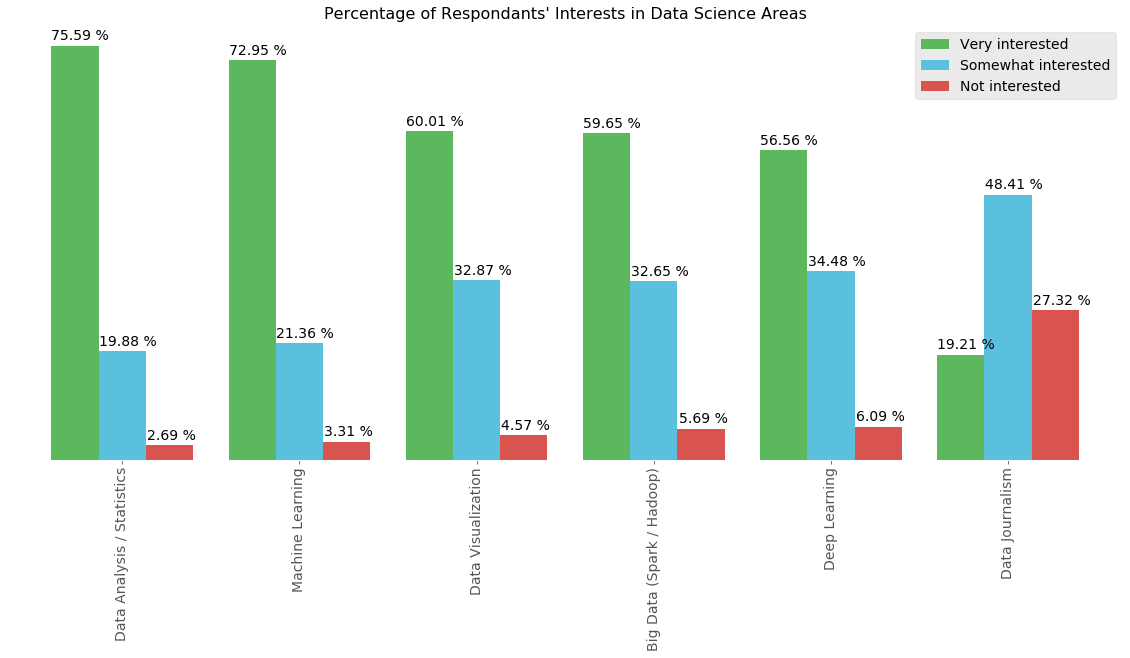

In [9]:
#Bar chart plot with Artist layer
ax = df_survey_percentage.plot(kind='bar', 
                               figsize = (20, 8), 
                               width = 0.8, 
                               color = ['#5cb85c', '#5bc0de', '#d9534f']
                              )

ax.set_title("Percentage of Respondants' Interests in Data Science Areas", fontsize=16)
ax.legend(fontsize=14)
ax.patch.set_color('white')
ax.tick_params(left=False)
ax.yaxis.set_visible(False)
plt.xticks(fontsize=14)

for i in range(0,6):
    k=-0.4
    for j in range(0,3):
        label = format(df_survey_percentage.iloc[i,j])
        value = df_survey_percentage.iloc[i,j]
        #plt.annotate(label+" %", xy=(i, value+1), color='black', fontsize=14)
        ax.text(i+k, value+1, label+" %", color='black', fontsize=14)
        k=k+0.27



In [10]:
import folium
print('Folium installed and imported!')

Folium installed and imported!


In [11]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [12]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [152]:
df_incidents.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [126]:
df_incidents['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [124]:
df = pd.DataFrame(df_count["PdDistrict"])

In [125]:
df["Count"] = 1
df

PdDistrict  Count
0         SOUTHERN      1
1         SOUTHERN      1
2          BAYVIEW      1
3       TENDERLOIN      1
4          MISSION      1
...            ...    ...
150495        PARK      1
150496     CENTRAL      1
150497     CENTRAL      1
150498     CENTRAL      1
150499    SOUTHERN      1

[150500 rows x 2 columns]

In [175]:
df_result = df.groupby('PdDistrict', axis=0, as_index=False).count()
df_result.rename(columns={'PdDistrict':'DISTRICT'},inplace=True)
df_result

DISTRICT  Count
0     BAYVIEW  14303
1     CENTRAL  17666
2   INGLESIDE  11594
3     MISSION  19503
4    NORTHERN  20100
5        PARK   8699
6    RICHMOND   8922
7    SOUTHERN  28445
8     TARAVAL  11325
9  TENDERLOIN   9942

In [176]:
df_result

DISTRICT  Count
0     BAYVIEW  14303
1     CENTRAL  17666
2   INGLESIDE  11594
3     MISSION  19503
4    NORTHERN  20100
5        PARK   8699
6    RICHMOND   8922
7    SOUTHERN  28445
8     TARAVAL  11325
9  TENDERLOIN   9942

In [104]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [170]:
!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.geojson -O sf.json
print('SF file downloaded!')

SF file downloaded!


In [179]:
#from folium import plugins
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
sanfran_map

In [177]:
sf_geo = r'sf.json'

In [173]:
threshold_scale = np.linspace(df_result['Count'].min(),
                              df_result['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

In [180]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
sanfran_map.choropleth(
    geo_data=sf_geo,
    data=df_result,
    columns=['DISTRICT', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale = threshold_scale,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map